In [13]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

print (tf.__version__) # 2.12.0

2.12.0


### Loading the fashion MNIST data 

In [20]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()






In [21]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [29]:

# class names are not included, need to create them to plot the images  
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

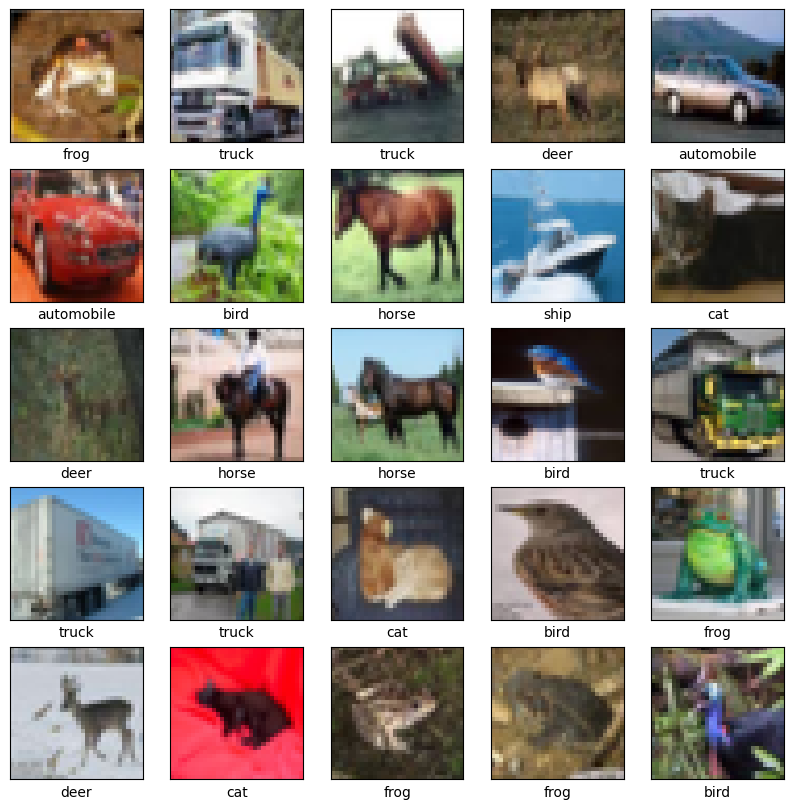

In [30]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)

	plt.xlabel(class_names[int(train_labels[i])])

### Exploring and Visualizing the data

In [31]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (50000, 32, 32, 3)
test_images: (10000, 32, 32, 3)


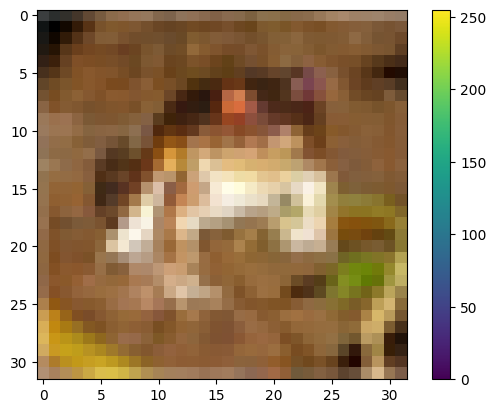

In [32]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Train classes distribution

In [33]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = train_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(train_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(train_images, train_labels)

airplane            :   5000 or 10.0%
automobile          :   5000 or 10.0%
bird                :   5000 or 10.0%
cat                 :   5000 or 10.0%
deer                :   5000 or 10.0%
dog                 :   5000 or 10.0%
frog                :   5000 or 10.0%
horse               :   5000 or 10.0%
ship                :   5000 or 10.0%
truck               :   5000 or 10.0%


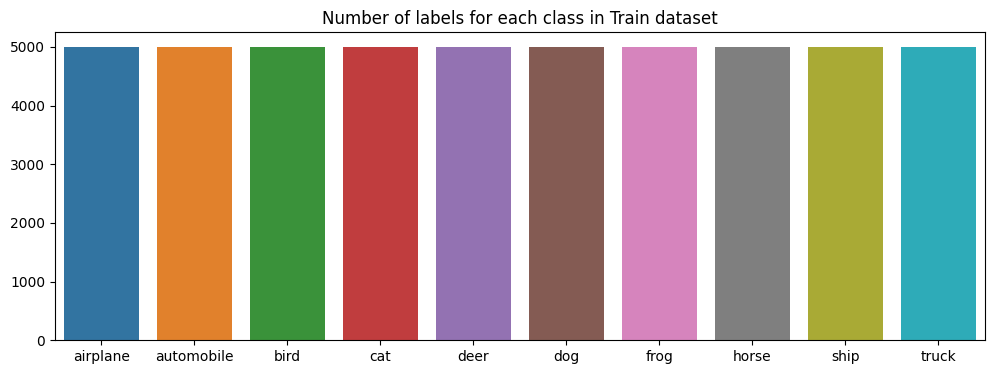

In [34]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Train dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

Test classes distribution

In [35]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = test_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(test_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(test_images, test_labels)

airplane            :   1000 or 10.0%
automobile          :   1000 or 10.0%
bird                :   1000 or 10.0%
cat                 :   1000 or 10.0%
deer                :   1000 or 10.0%
dog                 :   1000 or 10.0%
frog                :   1000 or 10.0%
horse               :   1000 or 10.0%
ship                :   1000 or 10.0%
truck               :   1000 or 10.0%


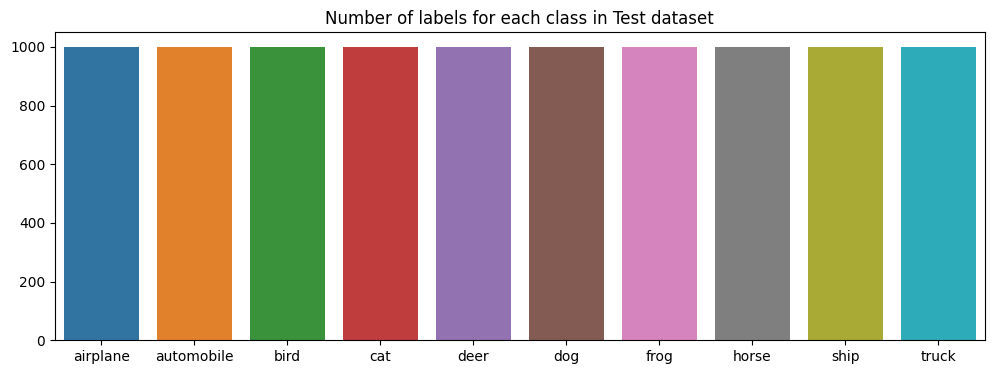

In [36]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Test dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

### Normalizing the data 

In [39]:
def data_preprocessing(images, labels):
    out_y = to_categorical(labels, 10)
    num_images = images.shape[0]
    x_shaped_array = images
    out_x = x_shaped_array / 255


    return out_x, out_y

In [40]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

In [41]:
train_images.shape

(50000, 32, 32, 3)

In [42]:
train_labels.shape

(50000, 10)

# **feature extraction**

In [44]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

In [45]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [46]:
conv_base.trainable = False

model_CNN = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

In [47]:
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model_CNN.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [49]:
# History
history_CNN=model_CNN.fit(train_images, train_labels, epochs=10, batch_size=200, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model _ vgg16 - test loss:", test_loss * 100)
print("Model _ vgg16 - test accuracy:", test_acc * 100)


Epoch 1/10
200/200 [==============================] - 541s 3s/step - loss: 1.5792 - accuracy: 0.4543 - val_loss: 1.3330 - val_accuracy: 0.5355
Epoch 2/10
200/200 [==============================] - 518s 3s/step - loss: 1.2776 - accuracy: 0.5573 - val_loss: 1.2528 - val_accuracy: 0.5656
Epoch 3/10
200/200 [==============================] - 515s 3s/step - loss: 1.2084 - accuracy: 0.5803 - val_loss: 1.2110 - val_accuracy: 0.5748
Epoch 4/10
200/200 [==============================] - 522s 3s/step - loss: 1.1633 - accuracy: 0.5977 - val_loss: 1.1913 - val_accuracy: 0.5861
Epoch 5/10
200/200 [==============================] - 517s 3s/step - loss: 1.1340 - accuracy: 0.6072 - val_loss: 1.1780 - val_accuracy: 0.5892
Epoch 6/10
200/200 [==============================] - 516s 3s/step - loss: 1.1090 - accuracy: 0.6145 - val_loss: 1.1590 - val_accuracy: 0.5967
Epoch 7/10
200/200 [==============================] - 516s 3s/step - loss: 1.0890 - accuracy: 0.6216 - val_loss: 1.1519 - val_accuracy: 0.5986

In [50]:
# Save model
model_CNN.save('Cifar10_VGG16_1')

INFO:tensorflow:Assets written to: Cifar10_VGG16_1\assets


INFO:tensorflow:Assets written to: Cifar10_VGG16_1\assets


In [51]:
history_CNN_2=model_CNN.fit(train_images, train_labels, epochs=10, batch_size=200, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model _ vgg16_2 - test loss:", test_loss * 100)
print("Model _ vgg16_2 - test accuracy:", test_acc * 100)

Epoch 1/10
200/200 [==============================] - 546s 3s/step - loss: 1.0229 - accuracy: 0.6472 - val_loss: 1.1292 - val_accuracy: 0.6112
Epoch 2/10
200/200 [==============================] - 532s 3s/step - loss: 1.0128 - accuracy: 0.6475 - val_loss: 1.1327 - val_accuracy: 0.6088
Epoch 3/10
200/200 [==============================] - 603s 3s/step - loss: 0.9957 - accuracy: 0.6542 - val_loss: 1.1420 - val_accuracy: 0.6067
Epoch 4/10
200/200 [==============================] - 541s 3s/step - loss: 0.9857 - accuracy: 0.6563 - val_loss: 1.1345 - val_accuracy: 0.6090
Epoch 5/10
200/200 [==============================] - 520s 3s/step - loss: 0.9732 - accuracy: 0.6611 - val_loss: 1.1284 - val_accuracy: 0.6122
Epoch 6/10
200/200 [==============================] - 517s 3s/step - loss: 0.9614 - accuracy: 0.6661 - val_loss: 1.1469 - val_accuracy: 0.6099
Epoch 7/10
200/200 [==============================] - 520s 3s/step - loss: 0.9512 - accuracy: 0.6714 - val_loss: 1.1313 - val_accuracy: 0.6122

In [52]:
# Save model
model_CNN.save('Cifar10_VGG16_2')

INFO:tensorflow:Assets written to: Cifar10_VGG16_2\assets


INFO:tensorflow:Assets written to: Cifar10_VGG16_2\assets


In [54]:
history_CNN_3=model_CNN.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model _ vgg16_3 - test loss:", test_loss * 100)
print("Model _ vgg16_3 - test accuracy:", test_acc * 100)

Epoch 1/5
 402/1250 [========>.....................] - ETA: 5:01 - loss: 0.8423 - accuracy: 0.6942

KeyboardInterrupt: 

In [23]:
#Plot loss results for training data and testing data
plt.plot(history_CNN.history['loss'], 'blue')
plt.plot(history_CNN.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


In [24]:
#Plot accuracy results for training data and testing data 
plt.plot(history_CNN.history['accuracy'], 'green')
plt.plot(history_CNN.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [22]:
# Load model
#model_CNN = tf.keras.models.load_model('fashion_MNIST_VGG16')


In [25]:
# Save model
model_CNN.save('fashion_MNIST_VGG16_2')

# **fine-tuning**

In [36]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [37]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [39]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [51]:
# History
history_CNN_2=model_CNN.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

In [41]:
# History
history_CNN_2=model_CNN.fit(train_images, train_labels, epochs=5, batch_size=480, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

In [42]:
# Save model
model_CNN.save('fashion_MNIST_VGG16_fine_tune_2')

In [43]:
#Plot loss results for training data and testing data
plt.plot(history_CNN_2.history['loss'], 'blue')
plt.plot(history_CNN_2.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [44]:
#Plot accuracy results for training data and testing data 
plt.plot(history_CNN_2.history['accuracy'], 'green')
plt.plot(history_CNN_2.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [45]:
predictions = model_CNN.predict(test_images)

In [46]:
predictions.shape

In [47]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [48]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    

Висновки:
1. Модель VGG16 з feature extraction та  fine-tuning потенційно може досягнути кращого результату ніж звичайна CNN при збільшенні епох навчання
2. Навчання відбувається досить повільно, навіть при зміні гіперпараметрів